We will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [3]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

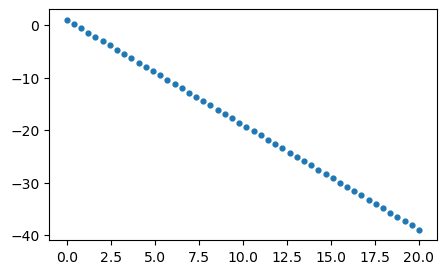

In [5]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,s=12)
plt.show()

#### create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check.

In [ ]:
def gd_single_var(X, y, alpha, max_iterations):
    X0 = np.ones(shape=(X.shape[0], 1))
    X_vec = np.concatenate([X0, X.reshape(X.shape[0], -1)], axis=1)  # Concatenate bias term
    theta_vec = np.zeros(shape=(X_vec.shape[1], 1))  # Column vector for theta
    theta_0_list = []
    theta_1_list = []
    J_list = []
    h_x_list = []
    theta_0_opt = 0
    theta_1_opt = 0
    epochs = []
    for iter in range(max_iterations):
        epochs.append(iter)
        theta_0_list.append(theta_vec[0,0])
        theta_1_list.append(theta_vec[1,0])
        h_X = X_vec @ theta_vec  # Prediction
        h_x_list.append(h_X)
        e_v = h_X - y.reshape(-1, 1)  #convert y to column vector
        j = (0.5 / len(X)) * (np.linalg.norm(e_v) ** 2)  # Compute cost
        J_list.append(j)  # Store cost values
        gradient_vec = (1 / len(X)) * (X_vec.T @ e_v)  # Compute gradient
        theta_vec = theta_vec - (alpha * gradient_vec)  # Update
        print(f"*************** Iteration {iter} ***************\n\n")
        print("h(x):\n",h_X.reshape(1,-1))
        print("Error Vector:\n", e_v.reshape(1,-1))
        print("\nj =",j)
        print("\nGradient Vector:\n", gradient_vec)
        print("\nGradient Vector Norm:\n",np.linalg.norm(gradient_vec,2))
        print("\ntheta_0_new:",theta_vec[0,0])
        print("theta_1_new:",theta_vec[1,0])
        
        # Check convergence
        if iter > 1:
            if (np.linalg.norm(gradient_vec, 2) < 0.001 or abs(J_list[-1] - J_list[-2]) <0.001):
                theta_0_opt = theta_vec[0,0]
                theta_1_opt = theta_vec[1,0]
                break
    print("*************** Training Report ***************\n\n")
    print(f"Gradient descent converged after {epochs[-1]} epochs")
    print("\ntheta_0_opt:",theta_vec[0,0])
    print("theta_1_opt:",theta_vec[1,0])
    print("Error Vector:\n", e_v.reshape(1,-1))
    print("\nCost =", j)
    print("h(x) = y_predict:\n",h_X.reshape(1,-1))
    print("y_actual:\n",y)
    
    return (epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt)   

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
X = np.linspace(0,20)
a=-2
b=1
y=a*X+b

epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = gd_single_var(X,y,alpha=0.0005, max_iterations= 300)

*************** Iteration 0 ***************


h(x):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Error Vector:
 [[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
   3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
   8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
  13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
  18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
  23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
  28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
  33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
  38.18367347 39.        ]]

j = 249.88775510204087

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
 260.0826935743251

theta_0_new: -0.0095
theta_1_new: -0.1

#### Calculate r2 score

In [8]:
from sklearn.metrics import r2_score

In [9]:
r2 = r2_score(y,h_x_list[-1])
print("r2_score:",r2)

r2_score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

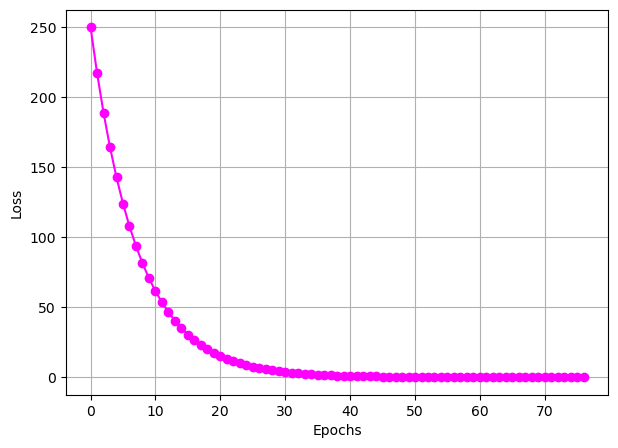

In [10]:
plt.figure(figsize=(7,5))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs,J_list,color='magenta', linestyle='-', marker='o')
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

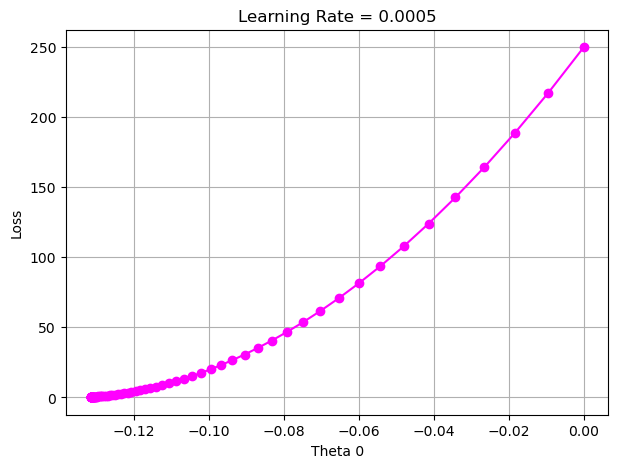

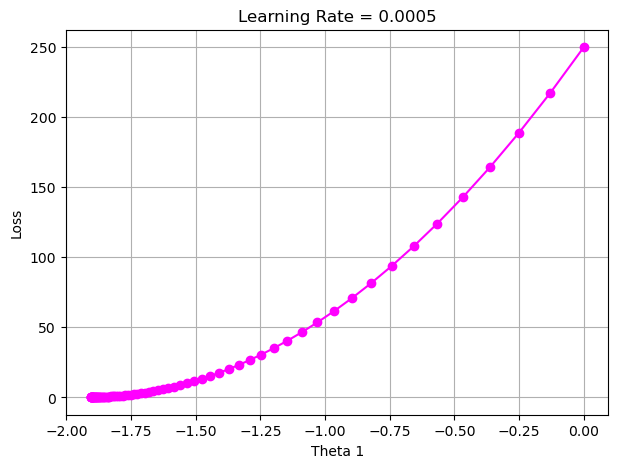

In [11]:
plt.figure(figsize=(7,5))
plt.plot(theta_0_list,J_list, color='magenta', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_1_list,J_list, color='magenta', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.grid()
plt.show()

#### Plot all regression lines till converge

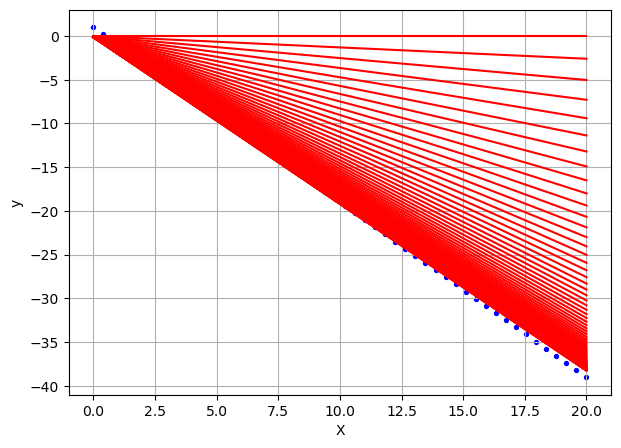

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(X,y, marker='o', color="blue", s=8)
for line in h_x_list:
    plt.plot(X,line, color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

#### Plot the best regression line

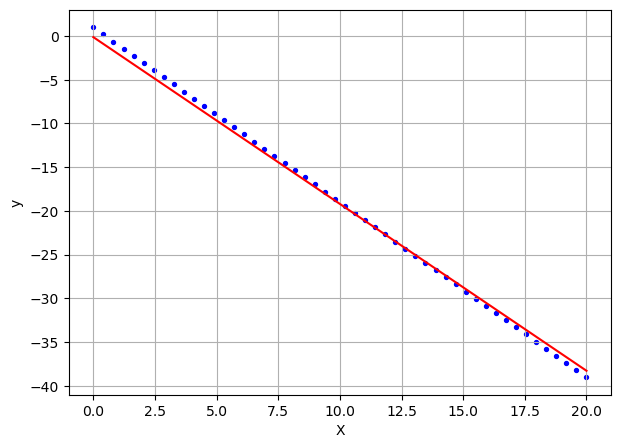

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(X,y, marker='o', color="blue", s=8)
plt.plot(X,h_x_list[-1], color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [14]:
epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = gd_single_var(X,y,alpha=0.00005,max_iterations=1000)

*************** Iteration 0 ***************


h(x):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Error Vector:
 [[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
   3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
   8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
  13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
  18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
  23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
  28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
  33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
  38.18367347 39.        ]]

j = 249.88775510204087

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
 260.0826935743251

theta_0_new: -0.00095
theta_1_new: -0.

In [15]:
r2 = r2_score(y,h_x_list[-1])
print("r2_score:",r2)

r2_score: 0.9965793400861428


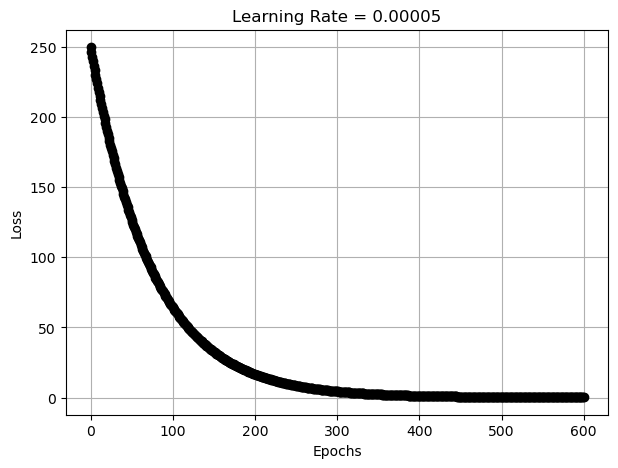

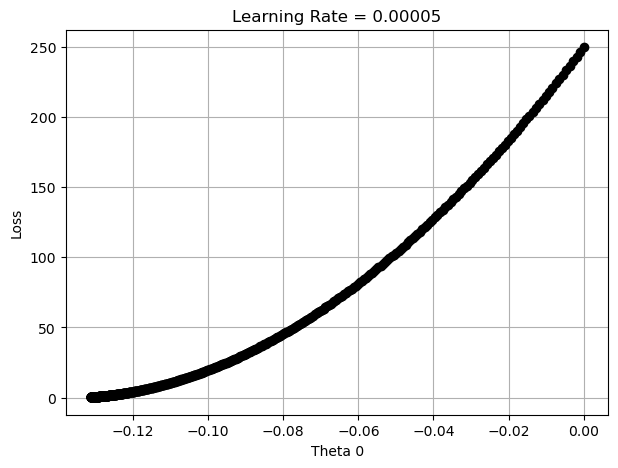

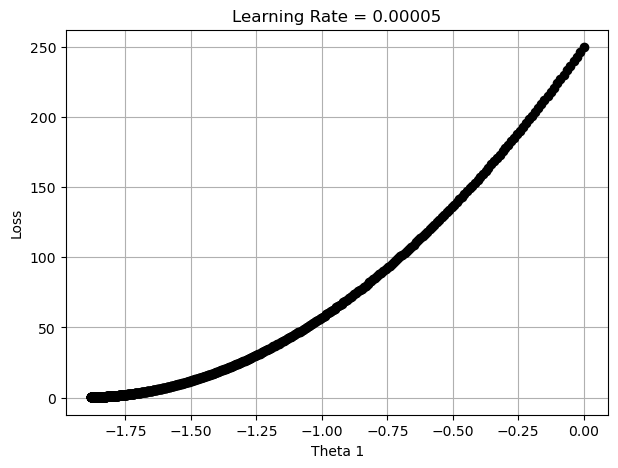

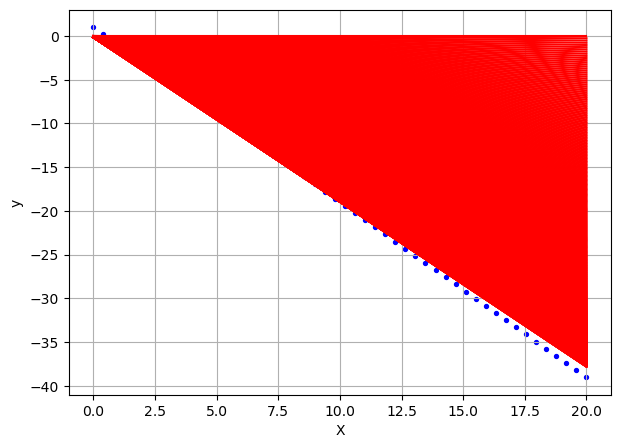

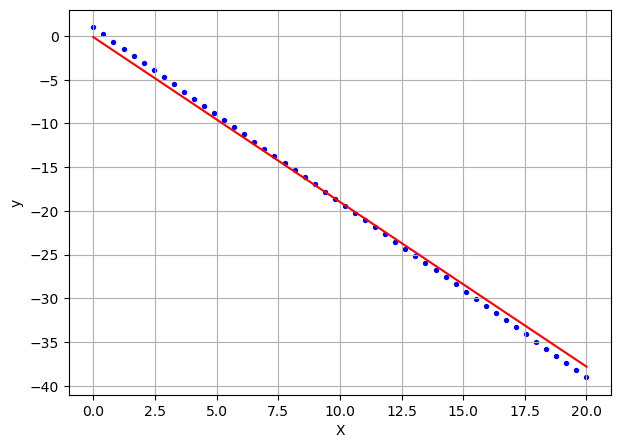

In [16]:
plt.figure(figsize=(7,5))
plt.plot(epochs,J_list, color='black', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00005")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_0_list,J_list, color='black', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00005")
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_1_list,J_list, color='black', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00005")
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(X,y, marker='o', color="blue", s=8)
for line in h_x_list:
    plt.plot(X,line, color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(X,y, marker='o', color="blue", s=8)
plt.plot(X,h_x_list[-1], color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [17]:
epochs, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = gd_single_var(X,y,alpha=0.005,max_iterations=300)

*************** Iteration 0 ***************


h(x):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Error Vector:
 [[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
   3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
   8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
  13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
  18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
  23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
  28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
  33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
  38.18367347 39.        ]]

j = 249.88775510204087

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
 260.0826935743251

theta_0_new: -0.095
theta_1_new: -1.29

In [18]:
r2 = r2_score(y,h_x_list[-1])
print("r2_score:",r2)

r2_score: 0.9976200723230484


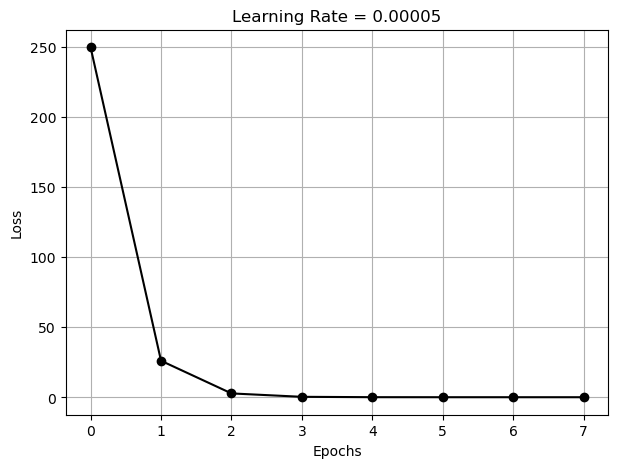

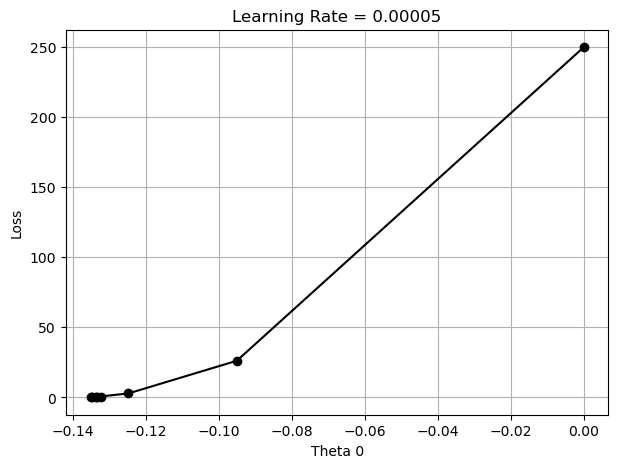

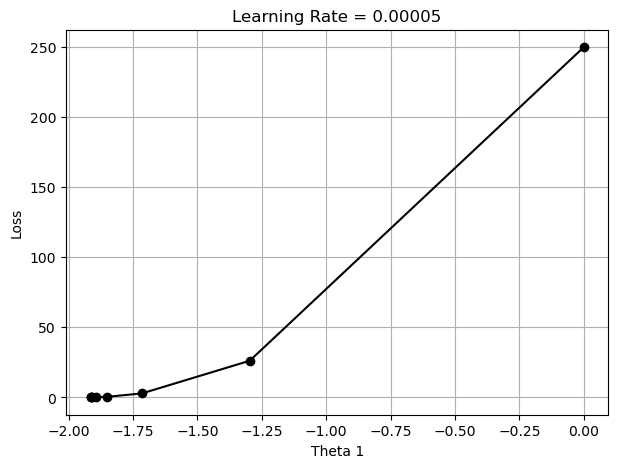

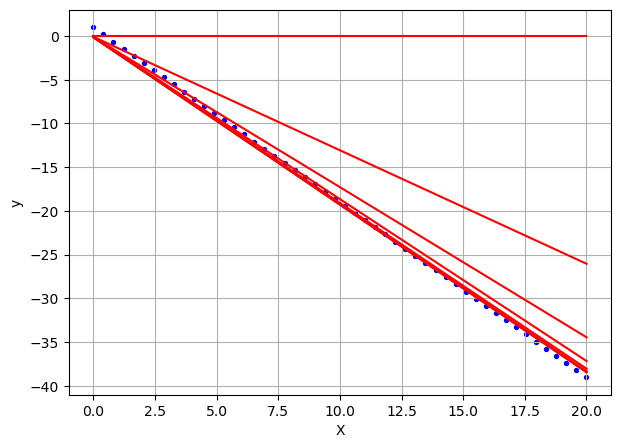

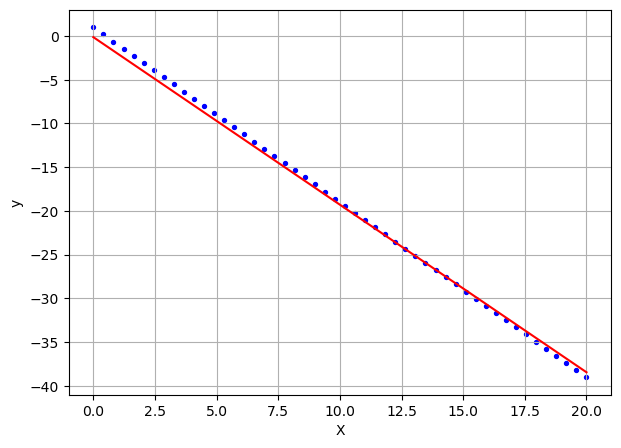

In [19]:
plt.figure(figsize=(7,5))
plt.plot(epochs,J_list, color='black', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00005")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_0_list,J_list, color='black', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00005")
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_1_list,J_list, color='black', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00005")
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(X,y, marker='o', color="blue", s=8)
for line in h_x_list:
    plt.plot(X,line, color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(X,y, marker='o', color="blue", s=8)
plt.plot(X,h_x_list[-1], color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [23]:
import numpy as np

def minibatch_gd_single_var(X, y, alpha, max_iterations, batchsize=10):
    X0 = np.ones(shape=(X.shape[0], 1))
    X_vec = np.concatenate([X0, X.reshape(X.shape[0], -1)], axis=1)  # Concatenate bias term
    theta_vec = np.zeros(shape=(X_vec.shape[1], 1))  # Column vector for theta
    theta_0_list = []
    theta_1_list = []
    J_list = []
    J_epochs = []
    h_x_list = []
    theta_0_opt = 0
    theta_1_opt = 0
    no_epochs = []
    iterations = []
    
    prev_cost = float('inf')  # Initialize previous cost to a high value
    n=0
    for epoch in range(max_iterations):
        # Shuffle X and y at the beginning of each epoch
        indices = np.random.permutation(len(X))
        X = X[indices]
        y = y[indices]
        X_vec = X_vec[indices]  # Keep bias term aligned
        no_epochs.append(epoch)
        i = 0  # Reset batch index
        
        while i < len(X):
            k = min(i + batchsize, len(X))  # Ensure batch does not exceed array size
            n+=1
            iterations.append(n)
            theta_0_list.append(theta_vec[0, 0])
            theta_1_list.append(theta_vec[1, 0])
            
            h_X = X_vec[i:k] @ theta_vec  # Prediction
            h_x_list.append(h_X)
            
            e_v = h_X - y[i:k].reshape(-1, 1)  # Convert y to column vector
            cost = (0.5 / len(X[i:k])) * (np.linalg.norm(e_v) ** 2)  # Compute cost
            J_list.append(cost)  # Store cost values
            
            gradient_vec = (1 / len(X[i:k])) * (X_vec[i:k].T @ e_v)  # Compute gradient
            theta_vec = theta_vec - (alpha * gradient_vec)  # Update
            
            # stopping condition 1
            if np.linalg.norm(gradient_vec, 2) < 0.01:
                print("*************** Training Report ***************\n\n")
                print(f"Gradient descent converged after {epoch} epochs")
                print("\ntheta_0_opt:", theta_vec[0, 0])
                print("theta_1_opt:", theta_vec[1, 0])
                print("\nFinal Cost =", cost)
                return (no_epochs, iterations, theta_0_list, theta_1_list, J_list, h_x_list, theta_vec[0, 0], theta_vec[1, 0])

            i = k  
        
        J_epochs.append(cost)
        
        # stopping condition 2
        if epoch > 0 and abs(J_epochs[-1] - prev_cost) < 0.01:
            theta_0_opt = theta_vec[0, 0]
            theta_1_opt = theta_vec[1, 0]
            print("*************** Training Report ***************\n\n")
            print(f"Gradient descent converged after {epoch} epochs")
            print("\ntheta_0_opt:", theta_vec[0, 0])
            print("theta_1_opt:", theta_vec[1, 0])
            print("\nFinal Cost =", cost)
            return (no_epochs, iterations, theta_0_list, theta_1_list, J_list, h_x_list, theta_0_opt, theta_1_opt)
        
        prev_cost = J_epochs[-1]  # Update previous cost
        
        print(f"*************** Epoch {epoch} ***************\n\n")
        print("\nCost =", cost)
        print("\nGradient Vector Norm:\n", np.linalg.norm(gradient_vec, 2))
        print("\ntheta_0_new:", theta_vec[0, 0])
        print("theta_1_new:", theta_vec[1, 0]) 

        # stopping condition 3: Max iterations
        if len(no_epochs) >= max_iterations:
            print("*************** Training Report ***************\n\n")
            print("Gradient descent reached max iterations")
            print("\ntheta_0_opt:", theta_vec[0, 0])
            print("theta_1_opt:", theta_vec[1, 0])
            print("\nFinal Cost =", cost)
            return (no_epochs, iterations, theta_0_list, theta_1_list, J_list, h_x_list, theta_vec[0, 0], theta_vec[1, 0])

    return (no_epochs, iterations, theta_0_list, theta_1_list, J_list, h_x_list, theta_0_opt, theta_1_opt)


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [83]:
no_epochs, iterations, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = minibatch_gd_single_var(X,y, alpha=0.0005,max_iterations=300, batchsize=1)

*************** Epoch 0 ***************



Cost = 0.1178269575812767

Gradient Vector Norm:
 2.4267246076542293

theta_0_new: -0.13335826327245096
theta_1_new: -1.86647869896495
*************** Epoch 1 ***************



Cost = 0.01632251585812408

Gradient Vector Norm:
 2.1462722437162656

theta_0_new: -0.1298748180365765
theta_1_new: -1.9187323903923599
*************** Training Report ***************


Gradient descent converged after 2 epochs

theta_0_opt: -0.12908167896685477
theta_1_opt: -1.9161290074516324

Final Cost = 2.247105065645096e-07


In [84]:
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
r2 = r2_score(y_actual, y_predict)
print("r2_score:",r2)

r2_score: 0.9976338447396168


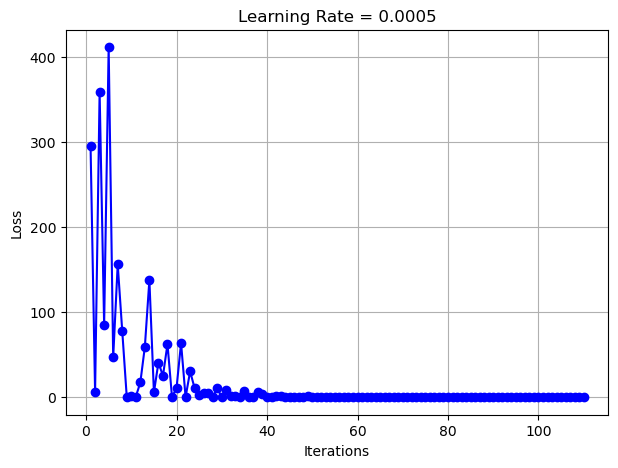

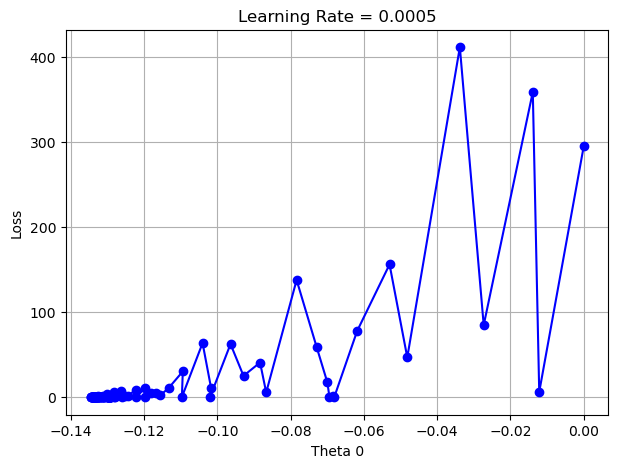

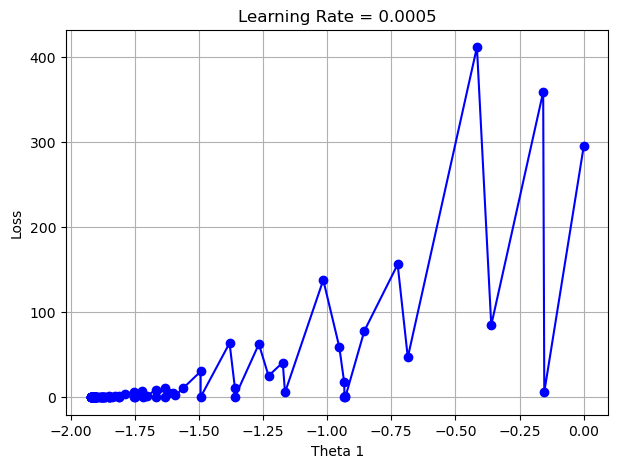

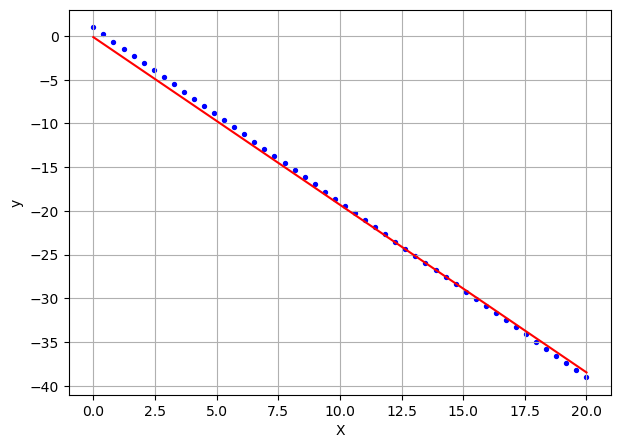

In [85]:
plt.figure(figsize=(7,5))
plt.plot(iterations,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_0_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_1_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
plt.scatter(X,y, marker='o', color="blue", s=8)
plt.plot(X,y_predict, color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

In [86]:
no_epochs, iterations, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = minibatch_gd_single_var(X,y, alpha=0.0001,max_iterations=300, batchsize=1)

*************** Epoch 0 ***************



Cost = 0.20734762799655318

Gradient Vector Norm:
 1.2329187691720191

theta_0_new: -0.06943000762114282
theta_1_new: -0.9506880771094506
*************** Epoch 1 ***************



Cost = 25.93850652851796

Gradient Vector Norm:
 103.14563749815647

theta_0_new: -0.10302377478128379
theta_1_new: -1.428948246836995
*************** Epoch 2 ***************



Cost = 2.8964913408881197

Gradient Vector Norm:
 25.655354146964733

theta_0_new: -0.11939013031188452
theta_1_new: -1.6702954890108015
*************** Epoch 3 ***************



Cost = 1.3230096430180198

Gradient Vector Norm:
 21.308337048347692

theta_0_new: -0.12672825187238093
theta_1_new: -1.7913308634749356
*************** Epoch 4 ***************



Cost = 0.11212471077060754

Gradient Vector Norm:
 2.1782399368997982

theta_0_new: -0.1299271562187321
theta_1_new: -1.853583702113586
*************** Epoch 5 ***************



Cost = 0.3587517143745746

Gradient Vector Norm:
 2.2406987

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [87]:
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
r2 = r2_score(y_actual, y_predict)
print("r2_score:",r2)

r2_score: 0.9977248021995788


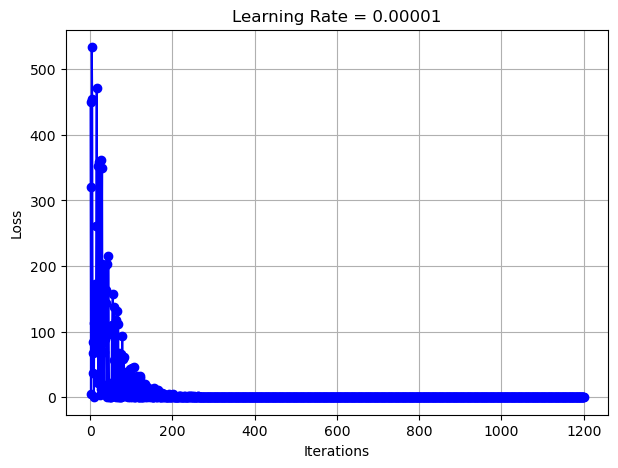

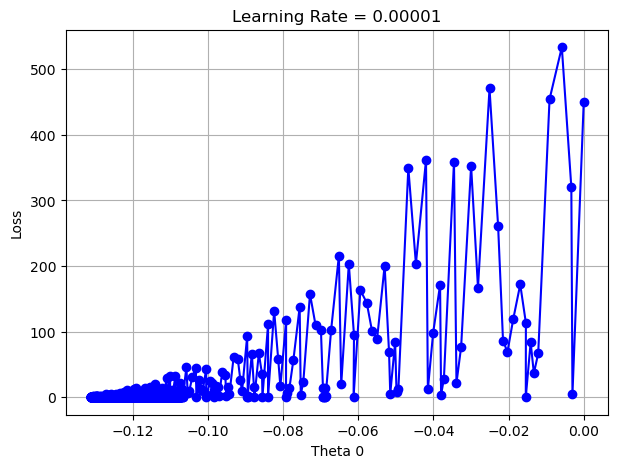

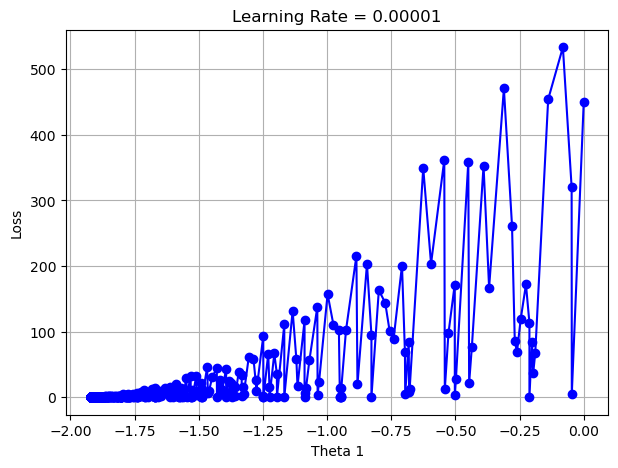

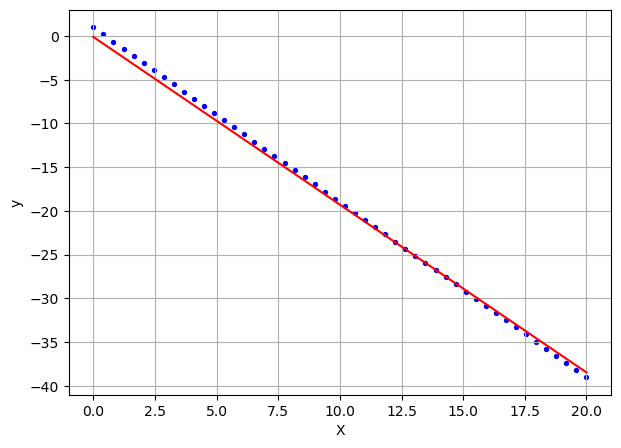

In [88]:
plt.figure(figsize=(7,5))
plt.plot(iterations,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00001")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_0_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00001")
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_1_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00001")
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
plt.scatter(X,y, marker='o', color="blue", s=8)
plt.plot(X,y_predict, color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [89]:
no_epochs, iterations, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = minibatch_gd_single_var(X,y, alpha=0.00007,max_iterations=300, batchsize=1)

*************** Epoch 0 ***************



Cost = 224.47415049005485

Gradient Vector Norm:
 363.8471870549336

theta_0_new: -0.053154950342566905
theta_1_new: -0.7280885518749025
*************** Epoch 1 ***************



Cost = 14.048070308823666

Gradient Vector Norm:
 41.44687209551496

theta_0_new: -0.08571900284622075
theta_1_new: -1.1794289455415616
*************** Epoch 2 ***************



Cost = 14.293478486058225

Gradient Vector Norm:
 63.512648846989734

theta_0_new: -0.10560657083349782
theta_1_new: -1.4593549915966817
*************** Epoch 3 ***************



Cost = 7.532260964511813

Gradient Vector Norm:
 52.42267135569865

theta_0_new: -0.1173615479743327
theta_1_new: -1.632566626737766
*************** Epoch 4 ***************



Cost = 0.6322503292747497

Gradient Vector Norm:
 1.1245001816582776

theta_0_new: -0.12442146664556157
theta_1_new: -1.7404451940198844
*************** Epoch 5 ***************



Cost = 0.04293572729262463

Gradient Vector Norm:
 2.172785930

In [90]:
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
r2 = r2_score(y_actual, y_predict)
print("r2_score:",r2)

r2_score: 0.994749442751829


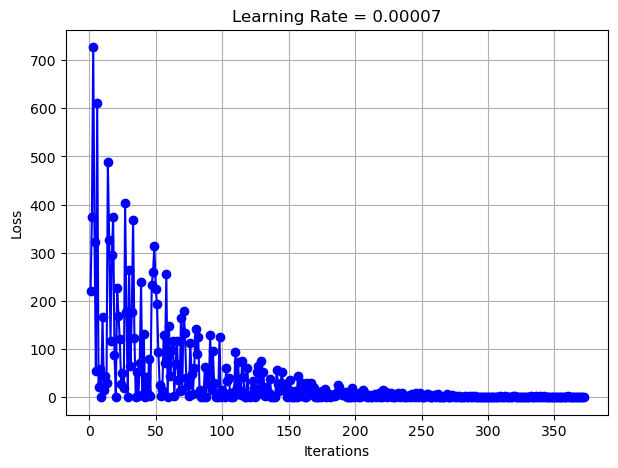

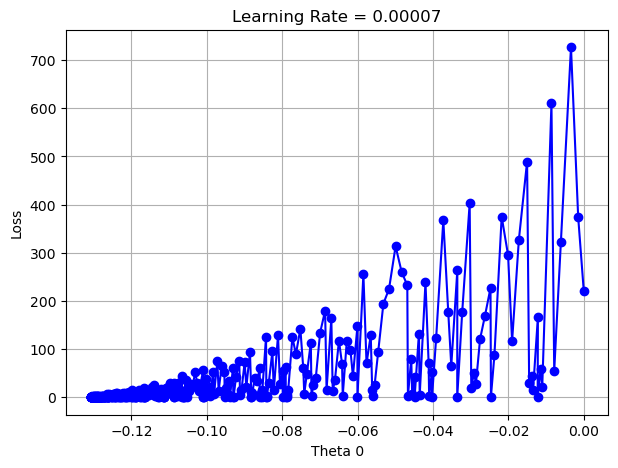

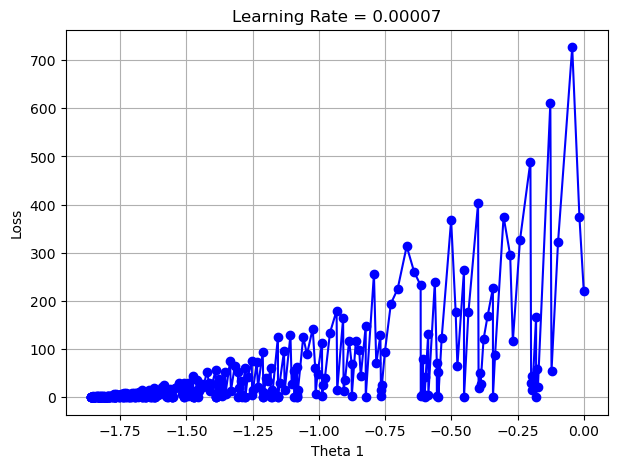

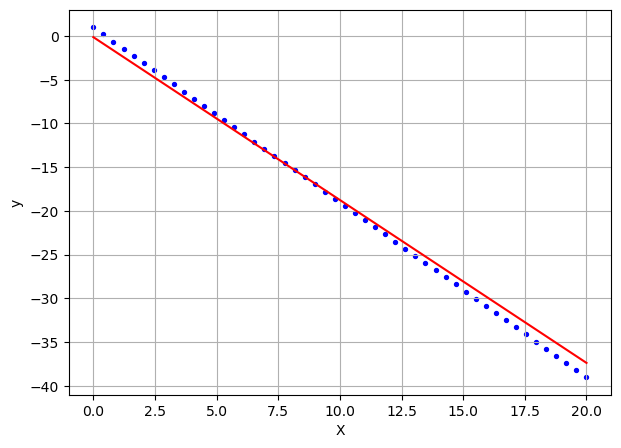

In [91]:
plt.figure(figsize=(7,5))
plt.plot(iterations,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00007")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_0_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00007")
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_1_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.00007")
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
plt.scatter(X,y, marker='o', color="blue", s=8)
plt.plot(X,y_predict, color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [102]:
no_epochs, iterations, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = minibatch_gd_single_var(X,y, alpha=0.0005,max_iterations=300, batchsize=5)

*************** Epoch 0 ***************



Cost = 72.29583021577551

Gradient Vector Norm:
 141.31396420271952

theta_0_new: -0.06983019755456238
theta_1_new: -0.9692324942050787
*************** Epoch 1 ***************



Cost = 8.858748516736803

Gradient Vector Norm:
 38.17808324485082

theta_0_new: -0.10391455052543437
theta_1_new: -1.4483842160628717
*************** Epoch 2 ***************



Cost = 9.248589871570765

Gradient Vector Norm:
 66.6100986421894

theta_0_new: -0.11999027297884347
theta_1_new: -1.6855019781383587
*************** Epoch 3 ***************



Cost = 0.952552733993554

Gradient Vector Norm:
 15.541752362294758

theta_0_new: -0.12707764618866169
theta_1_new: -1.8015550850480968
*************** Epoch 4 ***************



Cost = 0.14809613254100235

Gradient Vector Norm:
 3.2931147463137918

theta_0_new: -0.12979100135628002
theta_1_new: -1.8586716304807989
*************** Epoch 5 ***************



Cost = 0.29948693195001225

Gradient Vector Norm:
 11.701858987

In [103]:
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
r2 = r2_score(y_actual, y_predict)
print("r2_score:",r2)

r2_score: 0.9978118569201194


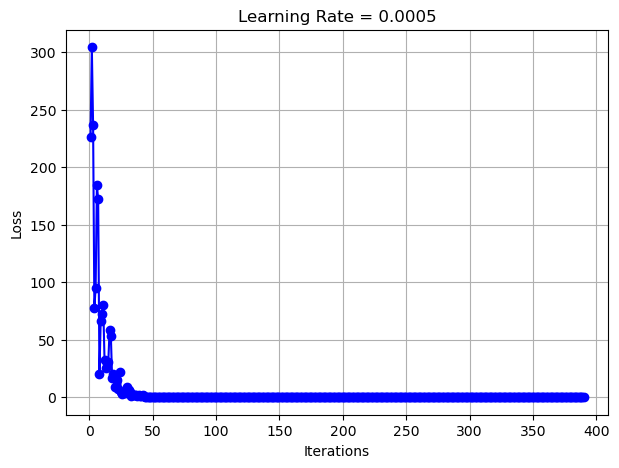

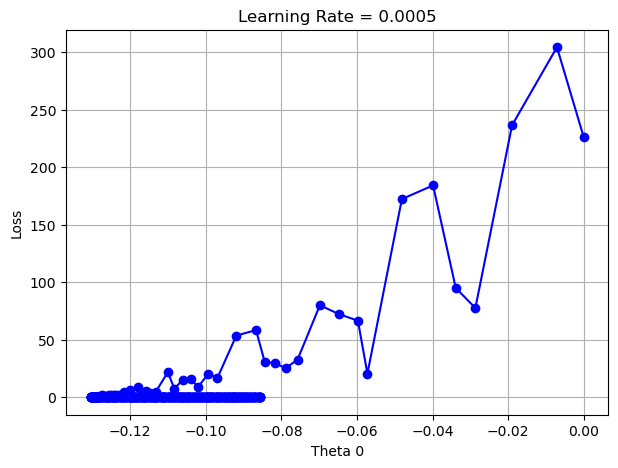

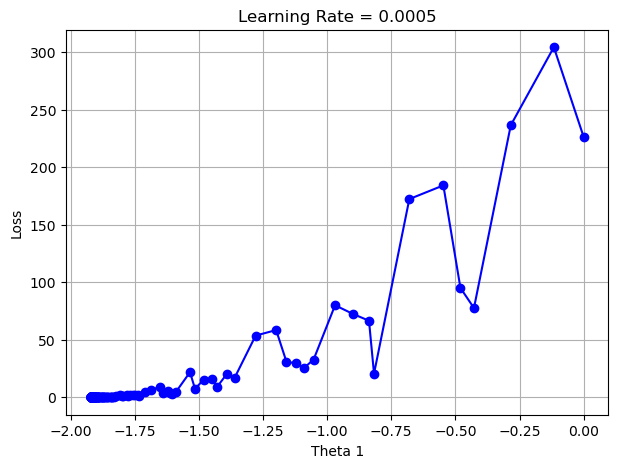

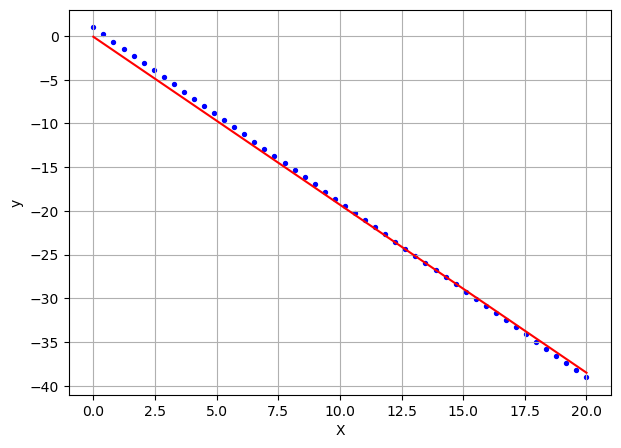

In [104]:
plt.figure(figsize=(7,5))
plt.plot(iterations,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_0_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_1_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
plt.scatter(X,y, marker='o', color="blue", s=8)
plt.plot(X,y_predict, color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [5]:
no_epochs, iterations, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = minibatch_gd_single_var(X,y, alpha=0.0005,max_iterations=300, batchsize=10)

*************** Epoch 0 ***************



Cost = 94.80101676165185

Gradient Vector Norm:
 134.22591460228233

theta_0_new: -0.04160617176485515
theta_1_new: -0.567923869948751
*************** Epoch 1 ***************



Cost = 84.69891055604191

Gradient Vector Norm:
 163.02194057918297

theta_0_new: -0.07067595691250785
theta_1_new: -0.9669266661826064
*************** Epoch 2 ***************



Cost = 37.67200819785939

Gradient Vector Norm:
 103.83094455177911

theta_0_new: -0.0908166845470736
theta_1_new: -1.24753996198763
*************** Epoch 3 ***************



Cost = 16.8088079327053

Gradient Vector Norm:
 66.58918510416204

theta_0_new: -0.10474185429577386
theta_1_new: -1.4452878920383083
*************** Epoch 4 ***************



Cost = 7.1203783606338975

Gradient Vector Norm:
 39.899939754628434

theta_0_new: -0.11432120622829037
theta_1_new: -1.5843878984220685
*************** Epoch 5 ***************



Cost = 5.559506468463237

Gradient Vector Norm:
 41.757456626009

t

In [7]:
from sklearn.metrics import r2_score
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
r2 = r2_score(y_actual, y_predict)
print("r2_score:",r2)

r2_score: 0.9976290535878026


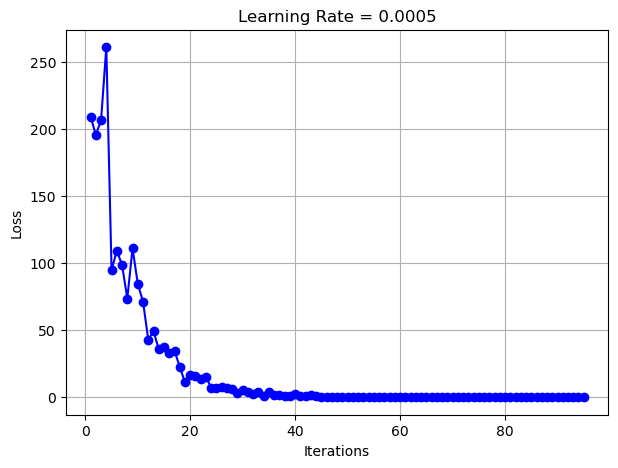

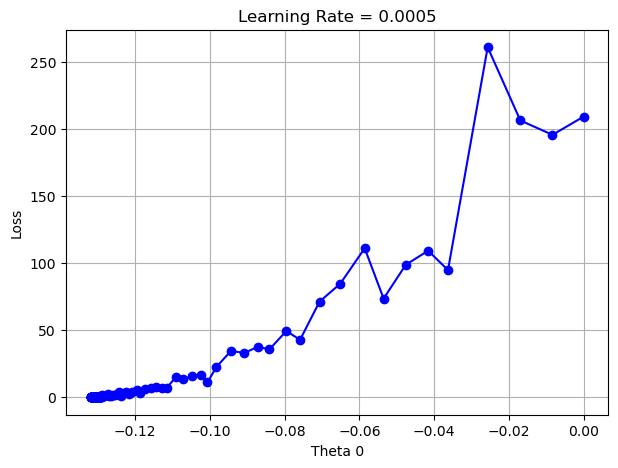

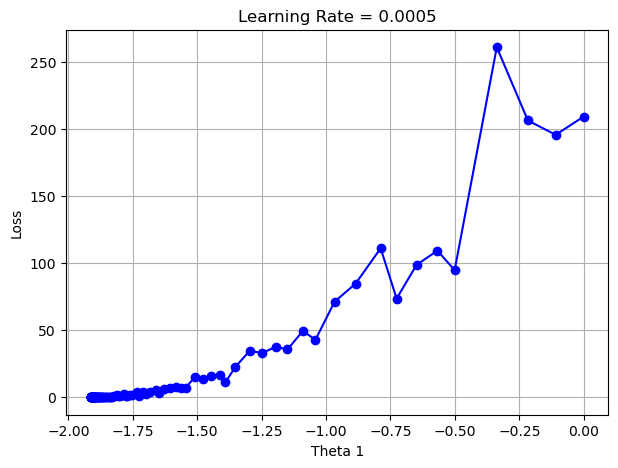

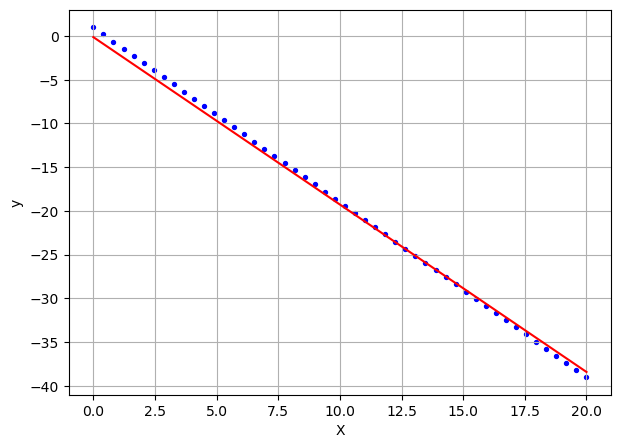

In [8]:
plt.figure(figsize=(7,5))
plt.plot(iterations,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_0_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_1_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
plt.scatter(X,y, marker='o', color="blue", s=8)
plt.plot(X,y_predict, color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [20]:
no_epochs, iterations, theta_0_list,theta_1_list, J_list,h_x_list,theta_0_opt,theta_1_opt = minibatch_gd_single_var(X,y, alpha=0.0005,max_iterations=300, batchsize=20)

*************** Epoch 0 ***************



Cost = 228.45558785243693

Gradient Vector Norm:
 271.62867460208656

theta_0_new: -0.027402076931265146
theta_1_new: -0.3743633769407373
*************** Epoch 1 ***************



Cost = 99.89865053816106

Gradient Vector Norm:
 149.94230539465718

theta_0_new: -0.048280318590696064
theta_1_new: -0.6590409916580068
*************** Epoch 2 ***************



Cost = 80.78105930012924

Gradient Vector Norm:
 147.9789032854367

theta_0_new: -0.06572782333410969
theta_1_new: -0.8973787468390847
*************** Epoch 3 ***************



Cost = 62.3078841611678

Gradient Vector Norm:
 139.4488697077004

theta_0_new: -0.08003422783599205
theta_1_new: -1.0951613650893277
*************** Epoch 4 ***************



Cost = 35.24991446436738

Gradient Vector Norm:
 97.8778657855687

theta_0_new: -0.09117371609330686
theta_1_new: -1.2511379662428674
*************** Epoch 5 ***************



Cost = 27.495180523870108

Gradient Vector Norm:
 93.13980550517

In [21]:
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
r2 = r2_score(y_actual, y_predict)
print("r2_score:",r2)

r2_score: 0.9975332231115301


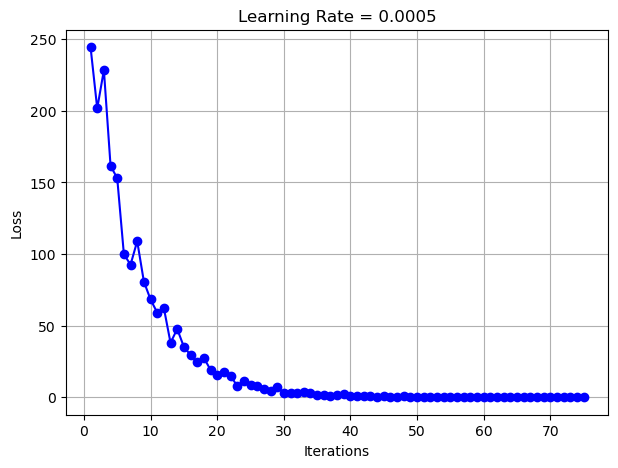

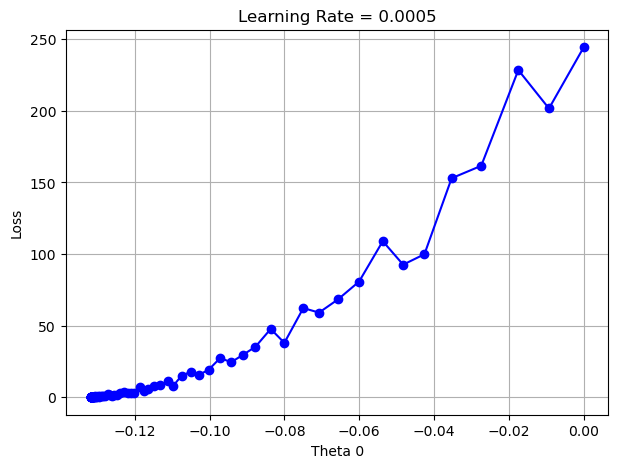

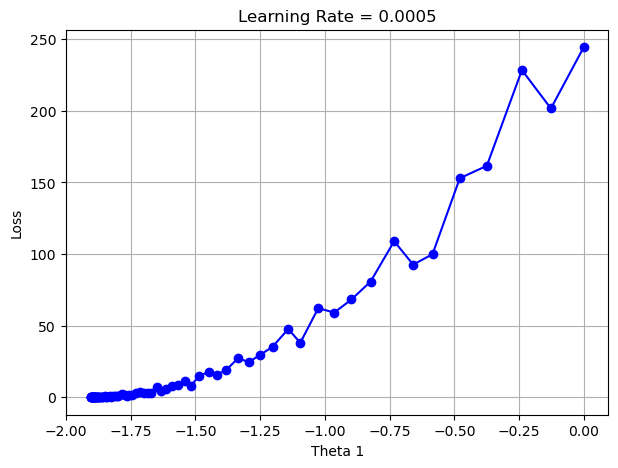

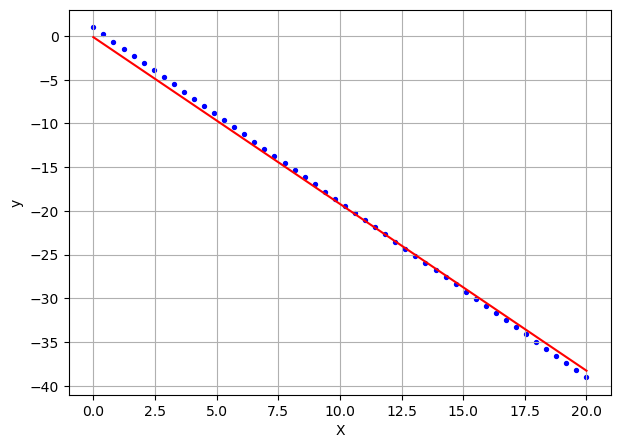

In [22]:
plt.figure(figsize=(7,5))
plt.plot(iterations,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_0_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(theta_1_list,J_list, color='blue', linestyle='-', marker='o')
plt.title("Learning Rate = 0.0005")
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
y_predict = theta_0_opt + theta_1_opt*X
y_actual = y
plt.scatter(X,y, marker='o', color="blue", s=8)
plt.plot(X,y_predict, color='red', linestyle='-')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()